## DA5401 Assignment 5
### Author: Ojas Phadake
### Roll No: CH22B007
### Date of Submission: 05-10-2004

This assignment aims to deepen the understanding of the challenges in real-world machine learning, specifically in **multi-label classification**, by utilizing advanced **non-linear dimensionality reduction techniques** such as **t-SNE and Isomap**. Visually inspect the data for issues such as
noisy labels, outliers, and hard-to-learn data points, sparking curiosity about data veracity in a biological context.

### Dataset
Yeast Dataset: The feature matrix X and the binary multi-label matrix Y (with 14 labels) are
standard files available from the [Mulan Repository](https://mulan.sourceforge.net/datasets-mlc.html) or other machine learning data repositories.

The task is to apply t-SNE and Isomap to the feature vectors to visually expose these data quality issues, thereby understanding the challenges a classifier would face.

## Importing libraries

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Tasks
### Part A: Preprocessing and Initial Setup
1. Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = sp.io.arff.loadarff("/content/drive/MyDrive/yeast.arff")
df = pd.DataFrame(data[0])

In [4]:
print(data[0].shape)

(2417,)


2. Dimensionality Check

In [5]:
print("The length of the data is: " , len(data[0]))
print(df.shape)
df.head()

The length of the data is:  2417
(2417, 117)


,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


  The size of the data indicates that it contains 2417 rows or samples and 117 features + class variables. Now, the next task will be to separate the class variables from the features for further processing.

In [6]:
print("Features of dataset are: ", df.columns[:103])
print("\nClass or to-predict labels are: ", df.columns[103:])

Features of dataset are:  Index(['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9',
       'Att10',
       ...
       'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100',
       'Att101', 'Att102', 'Att103'],
      dtype='object', length=103)

Class or to-predict labels are:  Index(['Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7',
       'Class8', 'Class9', 'Class10', 'Class11', 'Class12', 'Class13',
       'Class14'],
      dtype='object')


Thus from the above, we can see that there are 103 columns as features and 14 Class variables. The Class variables are what we will be analysing further in this assignment. The Class variables are stored as 'Class1', 'Class2' in the dataframe `df`.

In [7]:
print(df.isnull().sum())
print("Number of total missing elements are: " , df.isnull().sum().sum())

Att1       0
Att2       0
Att3       0
Att4       0
Att5       0
          ..
Class10    0
Class11    0
Class12    0
Class13    0
Class14    0
Length: 117, dtype: int64
Number of total missing elements are:  0


Thus, we can see that there are no null values and the data is clean for us to use. We would not need to remove the null samples or replace them with the mean/ median.

In [8]:
for col_name in df.columns[103:]:
    print(col_name, " has unique elements as ", df[col_name].value_counts())

Class1  has unique elements as  Class1
b'0'    1655
b'1'     762
Name: count, dtype: int64
Class2  has unique elements as  Class2
b'0'    1379
b'1'    1038
Name: count, dtype: int64
Class3  has unique elements as  Class3
b'0'    1434
b'1'     983
Name: count, dtype: int64
Class4  has unique elements as  Class4
b'0'    1555
b'1'     862
Name: count, dtype: int64
Class5  has unique elements as  Class5
b'0'    1695
b'1'     722
Name: count, dtype: int64
Class6  has unique elements as  Class6
b'0'    1820
b'1'     597
Name: count, dtype: int64
Class7  has unique elements as  Class7
b'0'    1989
b'1'     428
Name: count, dtype: int64
Class8  has unique elements as  Class8
b'0'    1937
b'1'     480
Name: count, dtype: int64
Class9  has unique elements as  Class9
b'0'    2239
b'1'     178
Name: count, dtype: int64
Class10  has unique elements as  Class10
b'0'    2164
b'1'     253
Name: count, dtype: int64
Class11  has unique elements as  Class11
b'0'    2128
b'1'     289
Name: count, dtype: i

3. Label Selection for Visualization

The columns were present in the format b'0' or b'1', so that had to be cleaned and replaced.

In [9]:
feature_cols = [col for col in df.columns if col.startswith('Att')]
label_cols = [col for col in df.columns if col.startswith('Class')]

for col in label_cols:
    df[col] = df[col].apply(lambda x: int(x.decode('utf-8')) if isinstance(x, bytes) else int(x))

Y = df[label_cols]
print("Label matrix shape:", Y.shape)
print("Sample:\n", Y.head())

Label matrix shape: (2417, 14)
Sample:
    Class1  Class2  Class3  Class4  Class5  Class6  Class7  Class8  Class9  \
0       0       0       0       0       0       0       1       1       0   
1       0       0       1       1       0       0       0       0       0   
2       0       1       1       0       0       0       0       0       0   
3       0       0       1       1       0       0       0       0       0   
4       0       0       1       1       1       1       0       0       0   

   Class10  Class11  Class12  Class13  Class14  
0        0        0        1        1        0  
1        0        0        0        0        0  
2        0        0        1        1        0  
3        0        0        0        0        0  
4        0        0        0        0        0  


In [10]:
label_counts = Y.sum(axis=1)

single_label_rows = Y[label_counts == 1]
multi_label_rows = Y[label_counts > 1]

single_label_counts = single_label_rows.sum(axis=0).sort_values(ascending=False)
print("The single label plots are:\n", single_label_counts)
top_two_single_labels = single_label_counts.head(2).index.tolist()
print("Top 2 single-label classes:", top_two_single_labels)

The single label plots are:
 Class1     32
Class2      0
Class3      0
Class4      0
Class5      0
Class6      0
Class7      0
Class8      0
Class9      0
Class10     0
Class11     0
Class12     0
Class13     0
Class14     0
dtype: int64
Top 2 single-label classes: ['Class1', 'Class2']


Thuis, we see that Single Class samples belong to only Class 1. The top 2 classes can be taken as 1 and any other, for ease we choose 2 here.

In [11]:
multi_label_combinations = multi_label_rows.apply(
    lambda row: tuple(row.index[row == 1]), axis=1
)
most_common_combo = multi_label_combinations.value_counts().idxmax()
print("5 most common combinations are:\n", multi_label_combinations.value_counts()[:5])
print("Most frequent multi-label combination:", most_common_combo)

5 most common combinations are:
 (Class3, Class4, Class12, Class13)    237
(Class4, Class5, Class12, Class13)    233
(Class1, Class2, Class12, Class13)    172
(Class1, Class2)                      131
(Class2, Class3, Class12, Class13)    117
Name: count, dtype: int64
Most frequent multi-label combination: ('Class3', 'Class4', 'Class12', 'Class13')


In [12]:
def categorize_row(row):
    active_labels = [lbl for lbl in label_cols if row[lbl] == 1]

    if len(active_labels) == 1:
        if active_labels[0] == top_two_single_labels[0]:
            return f"Single_{top_two_single_labels[0]}"
        elif active_labels[0] == top_two_single_labels[1]:
            return f"Single_{top_two_single_labels[1]}"

    if tuple(active_labels) == most_common_combo:
        return "Multi_Common"

    return "Other"

df['viz_label'] = Y.apply(categorize_row, axis=1)
print("\nVisualization Label Distribution:\n", df['viz_label'].value_counts())


Visualization Label Distribution:
 viz_label
Other            2148
Multi_Common      237
Single_Class1      32
Name: count, dtype: int64


Now the label selection for visualization has been done. Moving on to the standardization of the data part.  


Dimensionality reduction techniques such as t-SNE and Isomap rely heavily on pairwise distances (Euclidean or geodesic) between data points to uncover meaningful low-dimensional structures.
If features are not on a similar scale, features with larger numerical ranges will dominate the distance computations, leading to biased or misleading embeddings.

4. Scaling

In [13]:
X = df[feature_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean of standardized features :", X_scaled.mean(axis=0).mean(), " which is approximately 0. ")
print("Std of standardized features :", X_scaled.std(axis=0).mean())


Mean of standardized features : 1.1987417163186414e-18  which is approximately 0. 
Std of standardized features : 1.0


## Part B: t-SNE and Veracity Inspection
1. t-SNE Implementation

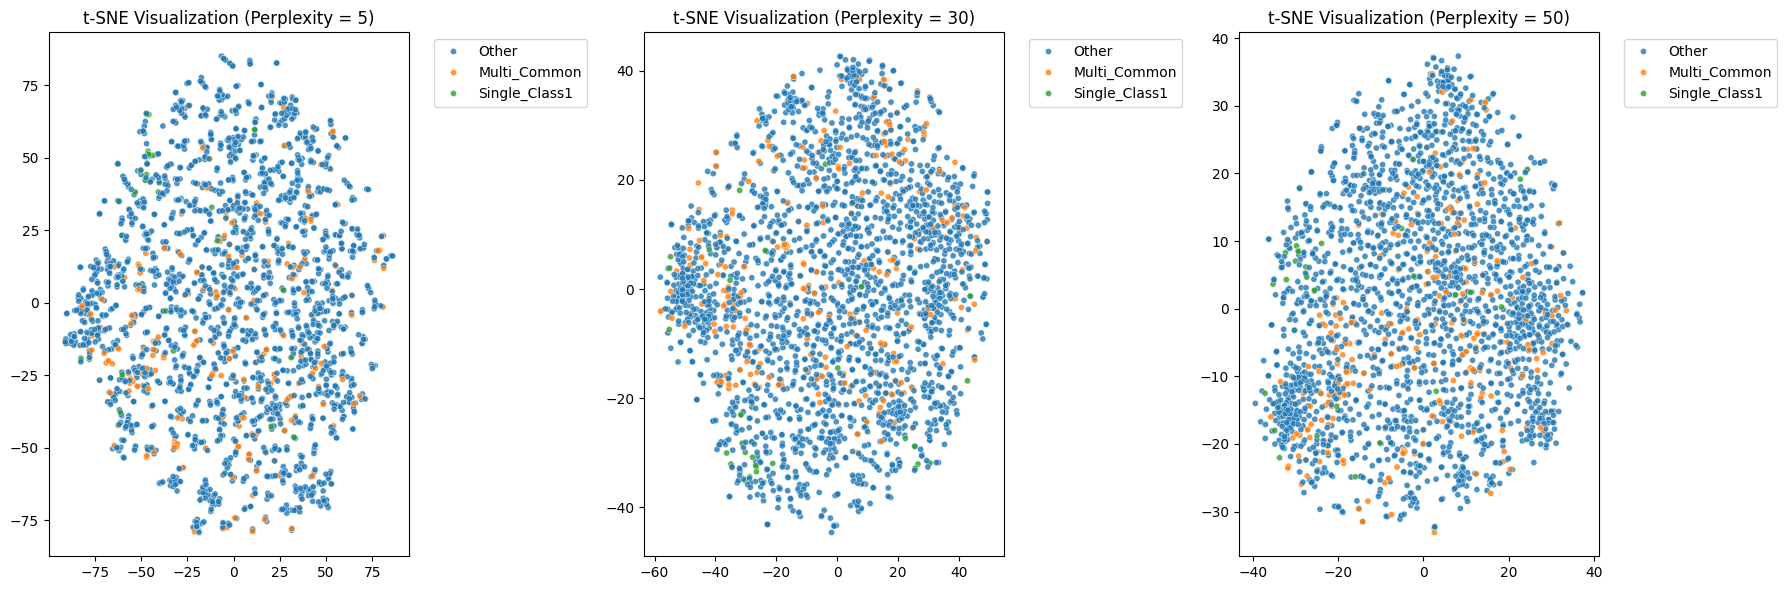

In [14]:
X_emb_input = X_scaled
labels_for_color = df['viz_label']

perplexities = [5, 30, 50]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, perp in zip(axes, perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, init='pca')
    X_tsne = tsne.fit_transform(X_emb_input)
    sns.scatterplot(
        x=X_tsne[:, 0],
        y=X_tsne[:, 1],
        hue=labels_for_color,
        palette="tab10",
        s=20,
        alpha=0.8,
        ax=ax
    )
    ax.set_title(f"t-SNE Visualization (Perplexity = {perp})")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Now, we have to figure out which value of perplexity is the most optimal for our dataset.

In [15]:
labels_for_color = df['viz_label']
X_emb_input = X_scaled

perplexities = np.linspace(5, 50, 10)

for i in range(len(perplexities)):
    perp = perplexities[i]
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, init='pca')
    X_tsne = tsne.fit_transform(X_emb_input)
    sil_score = silhouette_score(X_tsne, labels_for_color)
    print(f"Perplexity: {perp}, Silhouette Score: {sil_score}")
    print(perp, tsne.kl_divergence_)

Perplexity: 5.0, Silhouette Score: -0.10062385350465775
5.0 2.04784893989563
Perplexity: 10.0, Silhouette Score: -0.09379613399505615
10.0 2.225541353225708
Perplexity: 15.0, Silhouette Score: -0.04202289134263992
15.0 2.2599754333496094
Perplexity: 20.0, Silhouette Score: -0.08609097450971603
20.0 2.2383103370666504
Perplexity: 25.0, Silhouette Score: -0.05814149230718613
25.0 2.2043683528900146
Perplexity: 30.0, Silhouette Score: -0.05727535858750343
30.0 2.182413101196289
Perplexity: 35.0, Silhouette Score: -0.07789736241102219
35.0 2.157132863998413
Perplexity: 40.0, Silhouette Score: -0.0806664526462555
40.0 2.1263887882232666
Perplexity: 45.0, Silhouette Score: -0.08686140179634094
45.0 2.097517728805542
Perplexity: 50.0, Silhouette Score: -0.09558380395174026
50.0 2.0777950286865234


#### Perplexity Selection and Evaluation

To quantitatively determine an appropriate perplexity for t-SNE, I evaluated a range of values between 5 and 50, computing both the Silhouette Score (cluster separation) and KL Divergence (embedding loss).

| Perplexity | Silhouette Score | KL Divergence |
| ---------- | ---------------- | ------------- |
| 5          | -0.1006          | 2.048         |
| 10         | -0.0938          | 2.226         |
| 15         | **-0.0420**      | 2.260         |
| 20         | -0.0861          | 2.238         |
| 30         | -0.0573          | 2.182         |
| 40         | -0.0807          | 2.126         |
| 50         | -0.0956          | **2.078**     |

The Silhouette Score peaked around perplexity = 15, indicating relatively better separation between functional categories, while KL divergence decreased for larger perplexities, suggesting improved global consistency.

Hence, a moderate perplexity of 15-30 provides a balanced trade-off between local clustering fidelity and global structure preservation, making it a suitable choice for subsequent visualizations.

Thus, we are taking the **optimal value as 30 as a tradeoff between KL divergence and Silhouetter Score**.

2. Visualization

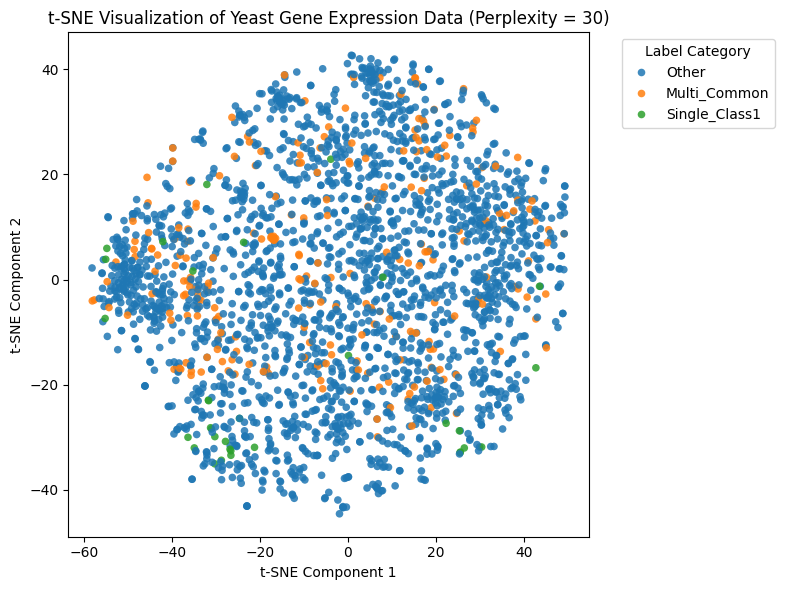

In [16]:
tsne_final = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
X_tsne_final = tsne_final.fit_transform(X_scaled)

tsne_df = pd.DataFrame({
    'TSNE1': X_tsne_final[:, 0],
    'TSNE2': X_tsne_final[:, 1],
    'viz_label': df['viz_label']
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=tsne_df,
    x='TSNE1', y='TSNE2',
    hue='viz_label',
    palette='tab10',
    s=30, alpha=0.85, edgecolor='none'
)
plt.title("t-SNE Visualization of Yeast Gene Expression Data (Perplexity = 30)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Label Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 3. Veracity Inspection

The 2D t-SNE plot above shows the embedding of yeast gene expression data, colored according to a simplified class index (`Single_Class1`, `Multi_Common`, `Other`). From the plot, several data veracity issues can be visually identified:

#### **1. Noisy / ambiguous**

**Observation:**
There are a few **green points (`Single_Class1`) and orange points (`Multi_Common`) that are deeply embedded within the large blue cluster (`Other`)**.

**Interpretation:**
These points likely correspond to **noisy or ambiguous labels**, where the assigned functional category does not match the local neighborhood of similar gene expression profiles. Possible reasons include:

* Multi-functional genes being misclassified as a single class.
* Experimental or annotation errors in labeling.

**Implication:**
A classifier would receive **conflicting signals** for these points, potentially reducing overall accuracy in these locregions.

#### **2. Outliers**

**Observation:**
A few points are **isolated or located far away from the main mass of points**, forming tiny distant clusters.

**Interpretation:**
These represent **outliers** in the gene expression data. Potential causes include:

* Experimental noise or rare measurement errors.
* Extreme biological conditions or unusual gene expression patterns.

**Implication:**
Outliers can distort distance-based models and complicate classification boundaries, making robustdeling more challenging.

#### **3. Hard-to-Learn Samples**

**Observation:**
Some regions in the plot show **heavy mixing of colors**, particularly where orange (`Multi_Common`) points overlap with blue (`Other`) points.

**Interpretation:**
These areas correspond to **hard-to-learn samples**, where the feature space does not provide clear separation between classes. Biologically, these genes may have **overlapping functional roles** or similar expression patterns.

**Implication:**
Simple classifiers (like linear models) would likely struggle here, as the decision boundaries are complex and non-linear. More sophisticated models or additional feature engineering would be required distinguish these samples accurately.

---

#### Summary Table

| Issue                      | Visual Signature                                | Possible Cause                                   | Modeling Challenge                            |
| -------------------------- | ----------------------------------------------- | ------------------------------------------------ | --------------------------------------------- |
| **Noisy/Ambiguous Labels** | Points of one color embedded in another cluster | Mislabeling or multi-functional genes            | Conflicting signals, reduced accuracy         |
| **Outliers**               | Isolated or distant points                      | Rare biological conditions or experimental noise | Distorted distance metrics, skewed boundaries |
| **Hard-to-Learn Samples**  | Mixed-color dense regions                       | Overlapping gene functions           sections consistently formatted. Do you want me to do that next?


## Part C: Isomap and Manifold Learning
### 1. Isomap Implementation

In [17]:
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_scaled)

isomap_df = pd.DataFrame({
    'ISOMAP1': X_isomap[:, 0],
    'ISOMAP2': X_isomap[:, 1],
    'viz_label': df['viz_label']
})

**Fundamental Difference Between Isomap and t-SNE**

Isomap focuses on preserving the global structure of the data. It computes geodesic distances (shortest paths along the data manifold) between all pairs of points, ensuring that far-apart relationships and overall manifold shape are retained in the lower-dimensional space.

In contrast, t-SNE emphasizes preserving the local structure — it models pairwise similarities so that nearby points in the high-dimensional space remain close in the embedding, while distant points are less constrained.

Thus, Isomap is better for revealing broad manifold geometry, whereas t-SNE excels at uncovering fine-grained local clusters.

| Aspect              | **t-SNE**                                                          | **Isomap**                                                               |
| ------------------- | ------------------------------------------------------------------ | ------------------------------------------------------------------------ |
| **Preserves**       | Local neighborhood structure (focuses on nearby points)            | Global manifold geometry (considers long-range relationships)            |
| **Distance Metric** | Probabilistic similarity (conditional probabilities)               | Geodesic distances along the manifold                                    |
| **Strength**        | Highlights fine-grained clusters, local separability               | Retains large-scale topology, continuous manifolds                       |
| **Weakness**        | May distort global layout (clusters may appear arbitrarily spaced) | Sensitive to noise/outliers; struggles if manifold is not well-connected |
| **Best for**        | Cluster analysis, local density visualization                      | Understanding global data continuity or manifold shape                   |

### 2. Visualization

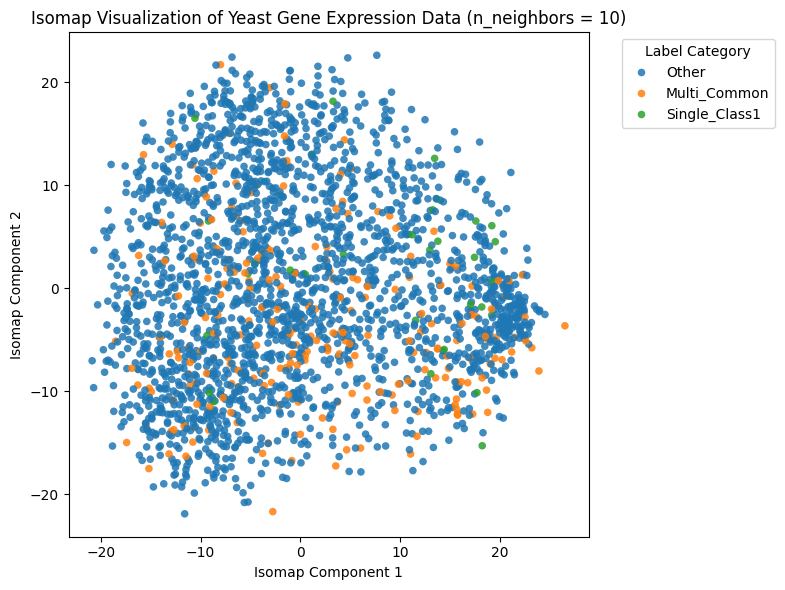

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=isomap_df,
    x='ISOMAP1', y='ISOMAP2',
    hue='viz_label',
    palette='tab10',
    s=30, alpha=0.85, edgecolor='none'
)
plt.title("Isomap Visualization of Yeast Gene Expression Data (n_neighbors = 10)")
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.legend(title='Label Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. Comparison and Curvature Analysis

#### **Comparison of Isomap vs. t-SNE**

In the context of the yeast gene expression data, **Isomap** tends to better preserve the **global structure** of the data, revealing how different clusters relate to each other in the overall manifold. It captures smooth transitions between functional categories, indicating potential biological relationships among gene functions.
On the other hand, **t-SNE** emphasizes **local relationships**, creating well-separated clusters for nearby points but often distorting large-scale distances. Hence, while t-SNE provides clearer local groupings, Isomap gives a more coherent picture of the **entire data topology** and inter-cluster connectivity.

#### **Data Manifold and Curvature**

The Isomap visualization suggests that the gene expression data likely lies on a **highly curved and complex manifold**. This curvature reflects nonlinear dependencies among genes — for example, co-expression patterns that vary across multiple biological pathways.
A highly curved manifold means that a simple linear classifier would struggle, as **decision boundaries** would need to adapt to these nonlinear structures.

## Conclusion
Thus, the assignment started with loading of the data and exploring various aspects of it. Post that, the multi-class columns were converted into 3 separate custom defined classes which would make it easier to visualize it.

Then, we implemented t-SNE and Veracity Inspection and also Isomap and Manifold Learning and visualized them appropriately using various hyperparameters.

Thus, this assignment taught that real world datasets are not as clean as toy datasets. Apart from that it taught a hands-on implementation of the techniques of t-SNE and Isomap.